In [ ]:
!pip install detectree
!pip install DeepForest

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when u

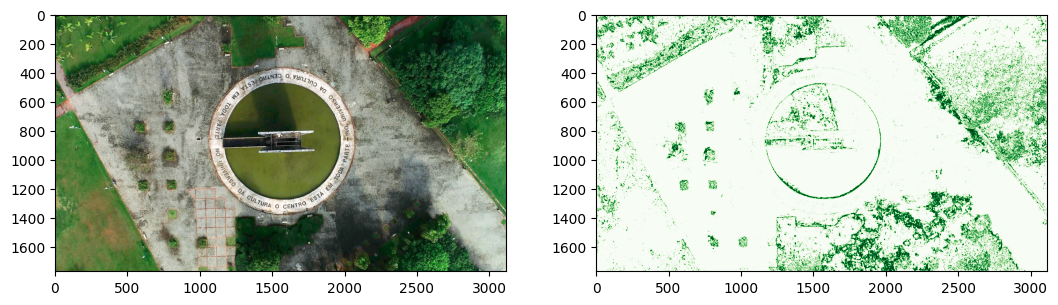

In [ ]:

import detectree as dtr
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio import plot

# use the pre-trained model to segment the image into tree/non-tree-pixels
tile_filename = '/content/cidadeUniversitaria.jpg'
y_pred = dtr.Classifier().predict_img(tile_filename)

# side-by-side plot of the tile and the predicted tree/non-tree pixels
figwidth, figheight = plt.rcParams["figure.figsize"]
fig, axes = plt.subplots(1, 2, figsize=(2 * figwidth, figheight))
with rio.open(tile_filename) as src:
    plot.show(src, ax=axes[0])
axes[1].imshow(y_pred, cmap='Greens')



In [ ]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


/usr/local/lib/python3.10/dist-packages/deepforest/main.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(self.release_state_dict))

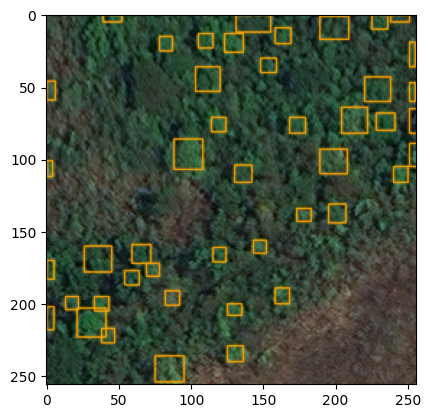

In [ ]:
from deepforest import main
from deepforest import get_data
import matplotlib.pyplot as plt

model = main.deepforest()
model.use_release()

sample_image_path = get_data("/content/998002_sat_40.jpg")
img = model.predict_image(path=sample_image_path, return_plot=True)

#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order. Many functions in deepforest will automatically perform this flip for you and give a warning.
plt.imshow(img[:,:,::-1])

In [ ]:
import csv
import numpy as np

image_path = "/content/image_praca_liberdade.jpg"
image_size = 250
box_size = 20


tile_filename = "/content/image_praca_liberdade.jpg"
y_pred = dtr.Classifier().predict_img(tile_filename)

tree_positions = np.argwhere(y_pred == 255)


bounding_boxes = []
group_size = 13
for i in range(0, len(tree_positions), group_size):
    group = tree_positions[i:i+group_size]
    if len(group) == group_size:
        y, x = group[group_size // 2]

        xmin = max(0, x - box_size // 2)
        ymin = max(0, y - box_size // 2)
        xmax = min(image_size, x + box_size // 2)
        ymax = min(image_size, y + box_size // 2)

        bounding_boxes.append([image_path, xmin, ymin, xmax, ymax, 'Tree'])

with open('tree_bounding_boxes.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_path', 'xmin', 'ymin', 'xmax', 'ymax', 'label'])
    writer.writerows(bounding_boxes)

print('CSV criado com sucesso.')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


CSV criado com sucesso.


In [ ]:
# import csv
# import numpy as np
# import detectree as dtr

# # Parâmetros da imagem e do bounding box
# image_path = "/content/ibirapuera-12.jpg"
# image_width, image_height = 3000, 1600  # Dimensões da imagem (3000x1600 pixels)
# box_size = 20  # Tamanho médio do bounding box

# # Use o Detectree para fazer a segmentação da imagem
# tile_filename = "/content/ibirapuera-12.jpg"
# y_pred = dtr.Classifier().predict_img(tile_filename)

# # Encontre as posições dos pixels classificados como árvore (valor 255 em y_pred)
# tree_positions = np.argwhere(y_pred == 255)

# # Calcular bounding boxes agrupando a cada 5 pixels e usando o valor central
# bounding_boxes = []
# group_size = 137  # Número de coordenadas a serem agrupadas
# for i in range(0, len(tree_positions), group_size):
#     group = tree_positions[i:i+group_size]
#     if len(group) == group_size:  # Garante que o grupo tem o tamanho certo
#         # Pega a posição central (o terceiro item) do grupo
#         y, x = group[group_size // 2]

#         # Calcule o bounding box ao redor do ponto central
#         xmin = max(0, x - box_size // 2)
#         ymin = max(0, y - box_size // 2)
#         xmax = min(image_width, x + box_size // 2)
#         ymax = min(image_height, y + box_size // 2)

#         # Validação: descartamos o bounding box se xmax < xmin ou ymax < ymin
#         if xmax > xmin and ymax > ymin:
#             bounding_boxes.append([image_path, xmin, ymin, xmax, ymax, 'Tree'])

# # Escreva os dados no arquivo CSV
# with open('tree_bounding_boxes.csv', mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(['image_path', 'xmin', 'ymin', 'xmax', 'ymax', 'label'])  # Cabeçalho
#     writer.writerows(bounding_boxes)

# print('CSV criado com sucesso.')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when u

CSV criado com sucesso.


In [ ]:
import os
annotations_file = get_data("/content/image_praca_liberdade.jpg")

model.config["epochs"] = 10
model.config["save-snapshot"] = False
model.config["train"]["csv_file"] = annotations_file
model.config["train"]["root_dir"] = os.path.dirname(annotations_file)

model.create_trainer()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop


In [ ]:
model.trainer.fit(model)

INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type                  | Params | Mode 
-------------------------------------------------------------
0 | model      | RetinaNet             | 32.1 M | eval 
1 | iou_metric | IntersectionOverUnion | 0      | train
2 | mAP_metric | MeanAveragePrecision  | 0      | train
-------------------------------------------------------------
31.9 M    Trainable params
222 K     Non-trainable params
32.1 M    Total params
128.592   Total estimated model params size (MB)
2         Modules in train mode
202       Modules in eval mode


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

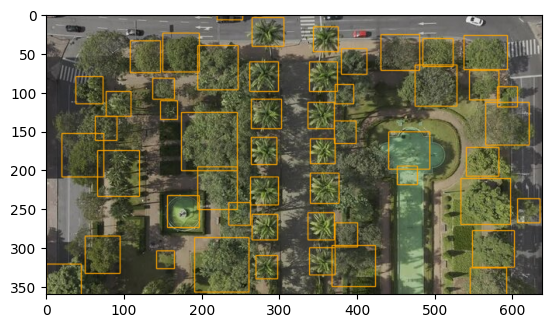

In [ ]:
sample_image_path = get_data("/content/image_praca_liberdadeBH.jpg")
img = model.predict_image(path=sample_image_path, return_plot=True)

#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order. Many functions in deepforest will automatically perform this flip for you and give a warning.
plt.imshow(img[:,:,::-1])